University of Stirling<br>
Author: John Poole (ID: 2636515)
#### CSCU9YE - Artificial Intelligence<br>

# Notebook 3 - Algorithm variant of your choice (30 %)

## Greedy constructive

I chose to implement a greedy constructive heuristic for my algorithm variant of choice. The greedy algorithm works by making the locally optimal choice at each stage. They usually fail to find the global optimum solution because they don't exhaustively explore all the data. However, it still represents an effective and efficient way to solve this particular optimisation problem. It should produce a result that improves on the multi-start hill-climb algorithm and is quicker than other optimisation methods. As a result of these characteristics, it makes a good choice for organising the colour palette for 100 and 500 colours.

### Reading the data file

In [1]:
import numpy as np
import random as rnd
import copy

# Read in the color data file 
# Input: string with file name
# Oputput: the number of colours (integer), and a list numpy arrays with all the colours
def read_data(fname):
    cols = np.loadtxt(fname, skiprows = 4) # The first 4 lines have text information, and are ignored     
    ncols = len(cols)     # Total number of colours and list of colours
    return ncols,cols

#### 100 Colour dataset

In [2]:
ncolors, colors = read_data("col100.txt")

#### 500 Colour dataset

In [27]:
ncolors, colors = read_data("col500.txt")

### Plotting a sequence of colours

In [3]:
import matplotlib.pyplot as plt

# Dsiplay the colors as a strip of color bars
# Input: list of colors, order of colors, and height/ratio

def plot_colors(col_list, col_order, ratio = 10): 
    assert len(col_list) == len(col_order)
    img = np.zeros((ratio, len(col_list), 3))
    for i in range(0, len(col_list)):
        img[:, i, :] = col_list[col_order[i]]
    fig, axes = plt.subplots(1, figsize=(10,6)) # figsize=(width,height) handles window dimensions
    axes.imshow(img, interpolation='nearest')
    axes.axis('off')
    plt.show()

### Evaluation function to determine the quality of a given ordering of colours

In [4]:
# This is an auxiliary function. It calculate the Euclidean distance between two individual colours
# Input: v and u as to be numpy arrays, vectors of real numbers with the RGB coordinates.

def euclid(v, u):
    return np.linalg.norm(v - u)

# Evaluation function.  Measures the quality of a given solution (ordering of colours) 
# The function computes the sum of the distances between all consecutive colours in the ordering
# Input: cols: list of colours 
#        ordc: ordering of colours
# Output: real number with the sumf of pair-wise differences in the colour ordering

def evaluate(cols, ordc):     
    adjacentColPairs = [[cols[ordc[i]],cols[ordc[i-1]]] for i in range(1,len(ordc))]
    return sum([euclid(i[1], i[0]) for i in adjacentColPairs])

### Greedy constructive algorithm

In [9]:
def random_sol():
    sol = list(range(ncolors))   # list of consequtive numbers from 0 to ncolors
    # Shuffle the elements in the list randomly. Shuffles in place and doesn’t retunr a value
    rnd.shuffle(sol)   
    return sol

def greedy(ncolr):
    colours = ncolr.copy()
    ordered_colours = []

    rnd_colour = rnd.choice(colours) # random start colour index
    colours.remove(rnd_colour) # remove colour from colours list
    ordered_colours.append(rnd_colour) # add colour to ordered colour list
    
    # Ensuring the list of colours is not empty 
    while len(colours) > 0:
        lowest_distance = 1000
        colour_val = colors[rnd_colour] # colour value at randomly selected index

        # Iterate through colours list 
        for i in range(0, len(colours)):
            current_distance = euclid(colour_val, colors[colours[i]]) # generate distance
            
            # if current distance is shorter, it becomes the new lowest distance
            if current_distance < lowest_distance: 
                lowest_distance = current_distance 
                next_colour = colours[i] # assign the next colour
   
        colours.remove(next_colour) # remove the next colour 
        ordered_colours.append(next_colour) # add next colour to ordered colour list
        rnd_colour = next_colour # reassign rnd_colour variable 
      
    return ordered_colours # return list of colours ordered by thier index 

#### Solution - Colour size 100


my_best100: [85, 4, 9, 57, 59, 83, 17, 32, 92, 70, 10, 58, 75, 86, 69, 47, 52, 67, 29, 68, 76, 40, 13, 7, 20, 53, 36, 25, 56, 5, 33, 12, 14, 91, 54, 31, 24, 72, 18, 46, 51, 44, 35, 81, 93, 19, 66, 23, 55, 39, 22, 48, 49, 74, 62, 27, 71, 41, 11, 95, 42, 34, 77, 16, 38, 26, 21, 90, 87, 65, 88, 1, 94, 78, 50, 37, 28, 84, 61, 30, 45, 43, 60, 80, 6, 63, 89, 64, 73, 3, 15, 82, 2, 8, 79, 0]

Objective Function: 16.97076365623553

Color Band:


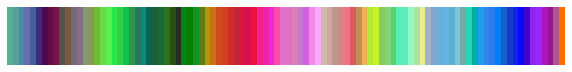

In [25]:
sol = random_sol()
greed = greedy(sol)

my_best100 = evaluate(colors, greed)
print('\nmy_best100:', greed)
print('\nObjective Function:', my_best100)
print('\nColor Band:')
plot_colors(colors, greed)

#### Solution - Colour size 500


my_best500: [425, 144, 48, 199, 355, 438, 233, 193, 323, 356, 15, 82, 247, 318, 327, 230, 134, 136, 109, 452, 266, 168, 63, 89, 407, 64, 315, 441, 203, 347, 126, 477, 374, 83, 253, 466, 319, 365, 208, 270, 148, 338, 258, 220, 416, 222, 389, 91, 187, 470, 464, 455, 10, 325, 158, 329, 368, 474, 234, 282, 395, 185, 42, 312, 289, 113, 415, 182, 221, 112, 26, 149, 145, 140, 390, 84, 367, 488, 273, 409, 241, 169, 481, 65, 229, 296, 90, 118, 87, 279, 223, 339, 85, 259, 335, 379, 21, 178, 493, 135, 361, 277, 487, 123, 40, 307, 14, 33, 314, 12, 291, 357, 56, 462, 25, 155, 53, 36, 171, 430, 5, 453, 343, 17, 102, 32, 92, 336, 147, 206, 167, 351, 392, 479, 70, 183, 433, 345, 58, 297, 457, 306, 213, 240, 295, 57, 160, 207, 101, 292, 391, 236, 371, 232, 127, 394, 366, 176, 269, 381, 214, 494, 181, 157, 450, 271, 71, 41, 446, 104, 401, 100, 11, 299, 108, 298, 34, 399, 404, 344, 138, 302, 252, 288, 254, 290, 16, 77, 175, 170, 310, 412, 397, 99, 205, 473, 54, 98, 243, 31, 423, 0, 363, 294, 24, 72, 18,

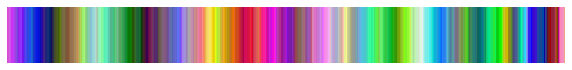

In [70]:
sol = random_sol()
greed = greedy(sol)

my_best500 = evaluate(colors, greed)
print('\nmy_best500:', greed)
print('\nObjective Function:', my_best500)
print('\nColor Band:')
plot_colors(colors, greed, 50)

### Experiments

The greedy constructive heuristic receives a random solution as its only parameter. I ran the algorithm for several different random solutions to produce the distances that I consider a minimum as a result of my experiments. Above is the lowest distances I found for colour sizes of 100 and 500. These values and the appearance of the colour band show improvements on the previous two algorithms. Therefore the aims of implementing this algorithm were achieved.